In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
# load data and get sample
df = pd.read_csv('../data/Pokemon.csv')
df.sample(6)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
257,238,Smoochum,Ice,Psychic,305,45,30,15,85,65,65,2,False
356,325,Spoink,Psychic,NaN,330,60,25,35,70,80,60,3,False
625,564,Tirtouga,Water,Rock,355,54,78,103,53,45,22,5,False
93,86,Seel,Water,NaN,325,65,45,55,45,70,45,1,False
236,218,Slugma,Fire,NaN,250,40,40,40,70,40,20,2,False
740,672,Skiddo,Grass,NaN,350,66,65,48,62,57,52,6,False


In [43]:
# get statistics // this omits categorical variables by default
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [44]:
# drop unnecessary columns // axis=1 for columns // inplace=True to modify df directly
df.drop(['Name','Type 1','Type 2','Generation','Legendary'], axis=1, inplace=True)


In [45]:
# check new dataframe
df.sample(5)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
758,688,306,42,52,67,39,56,50
572,513,316,50,53,48,53,48,64
639,578,370,65,40,50,125,60,30
202,187,250,35,35,40,35,55,50
180,166,390,55,35,50,55,110,85


In [46]:
# display numerical correlation between features by strength
df.corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


In [47]:
# choose the most correlated features
df.drop(['#'], axis=1, inplace=True)

In [48]:
df.head(6)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65
5,405,58,64,58,80,65,80


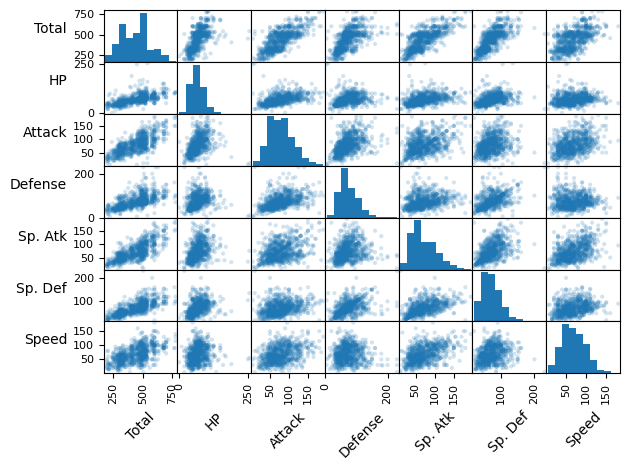

In [49]:
# plot a scatter matrix
axes = pd.plotting.scatter_matrix(df, alpha=0.2)

# rotate labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

# adjust spacing
plt.tight_layout()
plt.gcf().subplots_adjust(hspace=0, wspace=0)
plt.show()


In [50]:
# extracting input and output variables
X = df.iloc[:, 1:7].to_numpy()
y = df.iloc[:, 0].to_numpy()

# Preprocessing Data

In [51]:
from sklearn import preprocessing

# init scaler obj & standardize X (features)
std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

# visualize standardized vs non standardized data statistics
display(pd.DataFrame(X_std).describe().round(2))
display(pd.DataFrame(X).describe().round(2))

,0,1,2,3,4,5
count,800.00,800.00,800.00,800.00,800.00,800.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.67,-2.28,-2.21,-1.92,-1.87,-2.18
25%,-0.75,-0.74,-0.77,-0.71,-0.79,-0.80
50%,-0.17,-0.12,-0.12,-0.24,-0.07,-0.11
75%,0.42,0.65,0.52,0.68,0.65,0.75
max,7.28,3.42,5.01,3.71,5.68,3.85


,0,1,2,3,4,5
count,800.00,800.00,800.00,800.00,800.00,800.00
mean,69.26,79.00,73.84,72.82,71.90,68.28
std,25.53,32.46,31.18,32.72,27.83,29.06
min,1.00,5.00,5.00,10.00,20.00,5.00
25%,50.00,55.00,50.00,49.75,50.00,45.00
50%,65.00,75.00,70.00,65.00,70.00,65.00
75%,80.00,100.00,90.00,95.00,90.00,90.00
max,255.00,190.00,230.00,194.00,230.00,180.00


# Training model

In [52]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# train 80 / 20 test split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

reg_model = linear_model.LinearRegression() # init linear regression model object
reg_model.fit(X_train, y_train) # train model with training data

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [53]:
# print coefficientS and intercept
coef_ = reg_model.coef_
intercept_ = reg_model.intercept_
print(f"Model Coefficients: {[f'{coef:.2f}' for coef in coef_]}")
print(f"Model Intercept: {intercept_:.2f}")

Model Coefficients: ['25.52', '32.44', '31.16', '32.70', '27.81', '29.04']
Model Intercept: 435.10


# Visualizing Model
* 7 dimensional problem
* cannot used 2D or 3D (plane) plots
* Best way: predicted vs actual values

In [57]:
y_pred = reg_model.predict(X_test) # get predictions from test data

## Predicted vs Actual Values

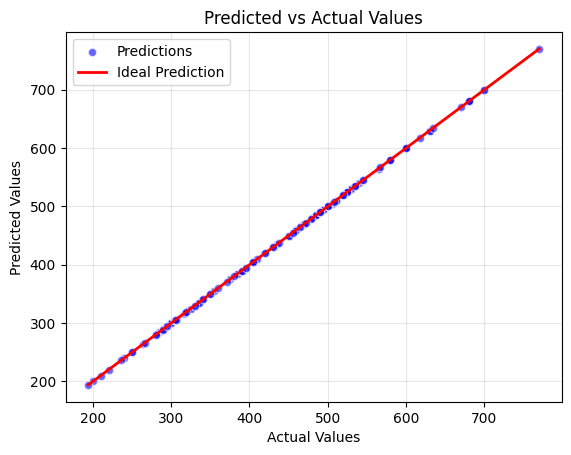

In [58]:
# create the predicted vs actual plot 
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors='w', label='Predictions')

# plot the ideal prediction line (line from min to max value)
line_coords = [y_test.min(), y_test.max()]
plt.plot(line_coords, line_coords, color='red', linestyle='-' , lw=2, label='Ideal Prediction')

plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 2D scatter graph
* It wont work
* For a given feature like "ATK" there are different target variables "TOTAL" because of the other features

Text(0, 0.5, 'Total')

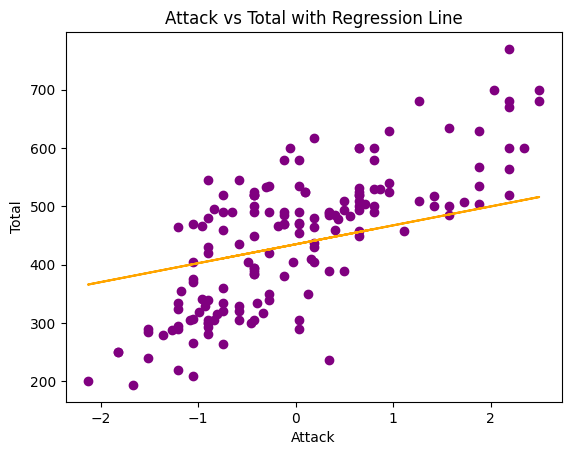

In [64]:
# plot a 2D scatter (ATK vs TOTAL)
plt.scatter(X_test[:, 1], y_test, color='purple')
plt.plot(X_test[:, 1], coef_[1] * X_test[:, 1] + intercept_, color='orange') # ignore all other stats for this 2D line
plt.title('Attack vs Total with Regression Line')
plt.xlabel('Attack')
plt.ylabel('Total')

## 3D plane graph
* Show 2 features at a time (e.g. Attack and Defense vs Total)

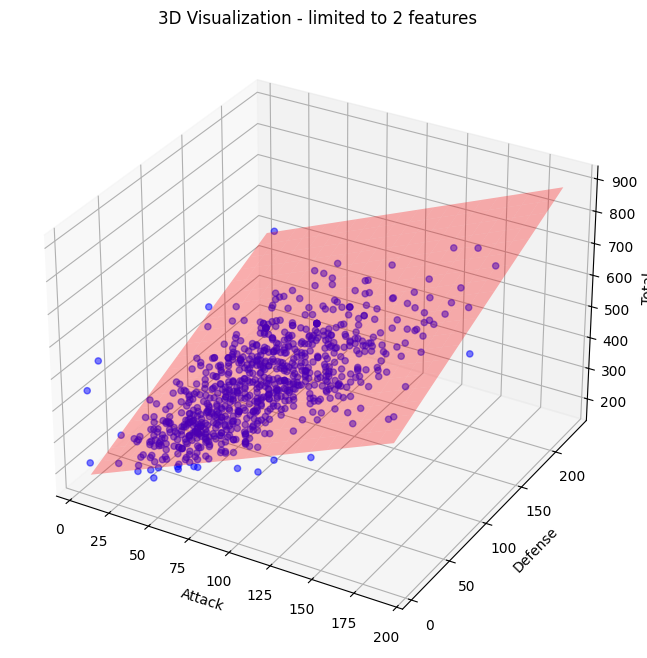

In [69]:
# plot 3D plane graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# adjust atk and def for 3D plot
X_3d = df[['Attack', 'Defense']]
model_3d = linear_model.LinearRegression()
model_3d.fit(X_3d, y)

ax.scatter(df['Attack'], df['Defense'], y, c='blue', marker='o', alpha=0.5)

# create meshgrid for surface
x_surf, y_surf = np.meshgrid(np.linspace(df.Attack.min(), df.Attack.max(), 20), 
                             np.linspace(df.Defense.min(), df.Defense.max(), 20))
z_surf = model_3d.intercept_ + model_3d.coef_[0]*x_surf + model_3d.coef_[1]*y_surf
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.3)

ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('Total')
plt.title('3D Visualization - limited to 2 features')
plt.show()

# Evaluate Model

In [70]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2 ): {r2:.2f}")

Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.00
R-squared (R2 ): 1.00


**TOTAL stats is the EXACT sum of all the other stats, hence, we have a perfect linear relationship.**